___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)

pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Read Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Techproed DS/grup EDA/ML1-AutoScout/final_scout_not_dummy.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Techproed DS/grup EDA/ML1-AutoScout/final_scout_not_dummy.csv'

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.columns

### Copy of Original DataFrame

In [ ]:
df2 = df.copy()

## Feature Engineering

In [ ]:
df.select_dtypes(include ="object").head()

## Dummies control?

In [10]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


* Comfort_Convenience : 6196
* Entertainment_Media : 346
* Extras              : 659
* Safety_Security     : 4442

Bu 4 değer çok fazla farklı gözlem içerdiği için, get dummies yaptığımızda çok fazla feature oluşturur ve bu datayı manipüle eder. Biz ise bunu arzu etmiyoruz. Bu yüzden get_dummies öncesi bu kontrolü yapmak önemli!!!

In [11]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

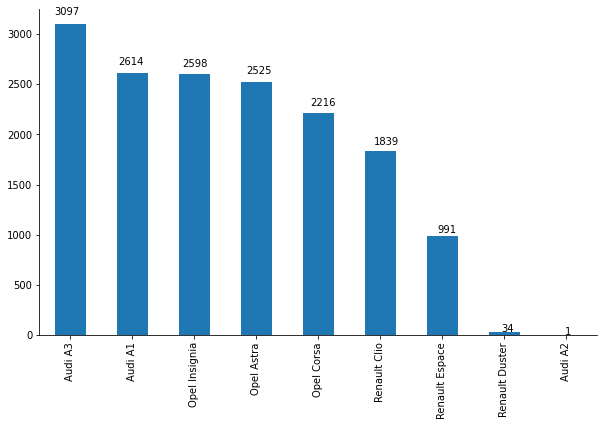

In [12]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [13]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [14]:
df.drop(index=[2614], inplace =True)

In [15]:
df.shape

(15914, 23)

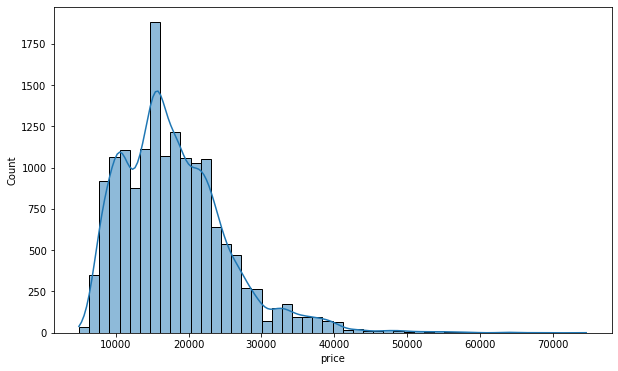

In [16]:
sns.histplot(df.price, bins=50, kde=True);

### skewness

In [17]:
skew(df.price)

1.236330745564795

skew değeri -1 ile +1 arasında ise çarpık değildir, outlier da varsa çarpıklık da varsa modele bi sokuyoruz. Değerimiz negatif ve çarpık ise soldan, pozitif ve çarpık ise sağdan çarpık özelliği gösterir. 

> Burada bizim değerimiz 1'den büyük fakat çok yakın bir değer olarak kendini gösterdi, çok çarpık bir veri değil. Normal dağılıma yakın, ignore edilebilir bir çarpıklık. 

In [18]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


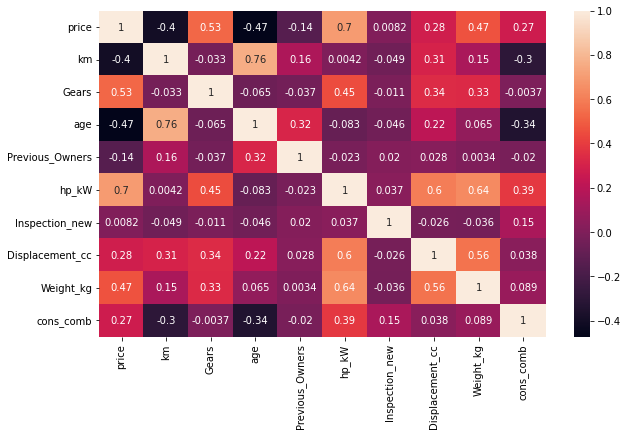

In [19]:
sns.heatmap(df_numeric.corr(), annot =True);

## multicollinearity control

In [20]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [21]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

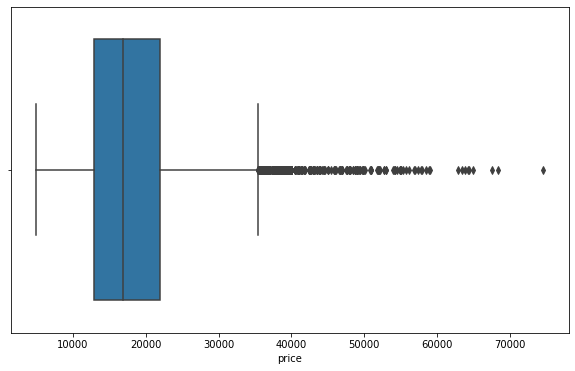

In [22]:
sns.boxplot(df.price);

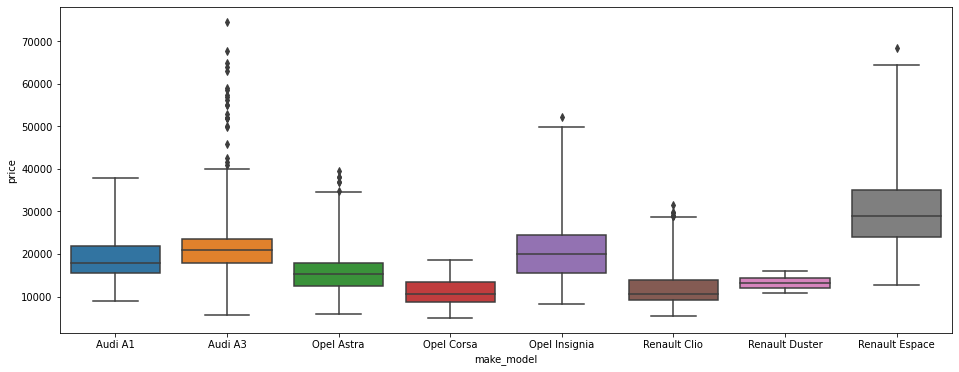

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [24]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

Yukarıda "dummies control" bölümünde dikkat çektiğimiz 4 feature'ın kontrolsüzce dummies halinde yeni feature lar üretip datayı manipüle etmemesi için virgülden böl ve feature'ın baş harflerinden ön ek yap diye komut verdik.

In [25]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

tekrar olmaması adına orijinal feature ları artık ihtiyacımız kalmadığı için düşürüyoruz.

In [26]:
df = pd.get_dummies(df, drop_first =True)

get_dummies de tekrar olmaması için drop_first=True'yu kullanıyoruz

In [27]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [28]:
df.shape

(15914, 133)

In [29]:
df.isnull().any().any()

False

In [30]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.473478
Gearing_Type_Manual                        -0.431798
km                                         -0.399301
make_model_Opel Corsa                      -0.379363
Type_Used                                  -0.366300
make_model_Renault Clio                    -0.297910
Drive_chain_front                          -0.155738
Previous_Owners                            -0.144625
make_model_Opel Astra                      -0.128429
em_CD player                               -0.092823
em_On-board computer                       -0.077462
ss_Central door lock with remote control   -0.070339
ss_Fog lights                              -0.053086
Paint_Type_Perl effect                     -0.049887
ss_Isofix                                  -0.045762
body_type_Sedans                           -0.044251
ss_Central door lock                       -0.043515
ss_Power steering                          -0.041182
Paint_Type_Uni/basic                       -0.

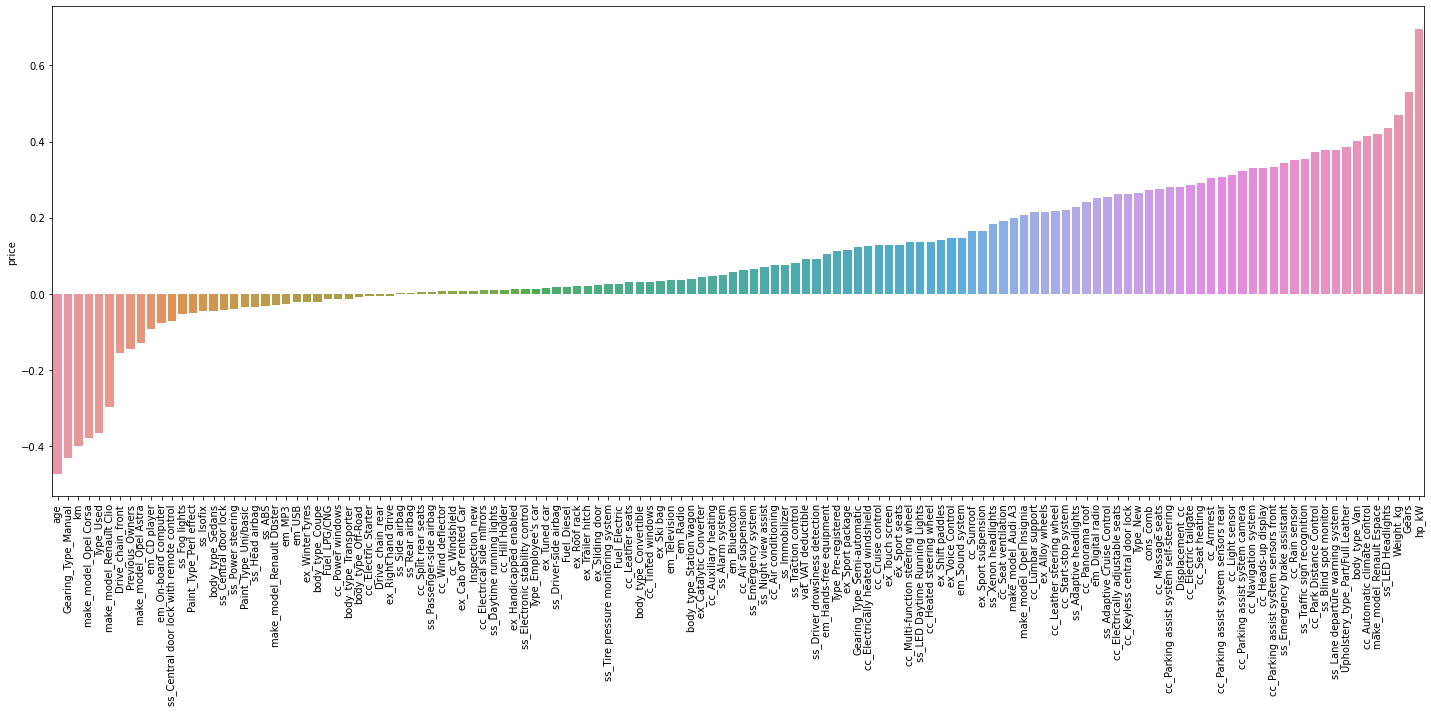

In [31]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

plt.tight_layout(); daha düzgün bir görünüm sağlıyor, özellikle x eksenindeki yazılı olan columnlarda

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

### random_state=101

### test size = 0.2

In [32]:
X = df.drop(columns="price")
y = df.price

columns = "target feature" parametresini kullandığımızda axis belirtmemize gerek yok çünkü zaten "target feature" columnunu düşür diyoruz; fakat parametre kullanmadan direk "target feature" yazarsak o durumda sıralı ilk parametre columns olmadığı için axis=1 demeliyiz, yoksa hata verir. İki yazım da aynı output u veriyor. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
X_train.shape

(12731, 132)

In [35]:
X_test.shape

(3183, 132)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [39]:
pd.options.display.float_format = '{:.3f}'.format

In [40]:
pd.DataFrame({
    "train": {
        "R2": r2_score(y_train, y_train_pred),
        "mae": mean_absolute_error(y_train, y_train_pred),
        "mse": mean_squared_error(y_train, y_train_pred),
        "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    "test": {
        "R2": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred),
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred))
    }
})

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [ ]:
price_mean = df["price"].mean()
price_mean

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred)) / price_mean  # rmse ye göre modelimiz gerçek değerden %13.3 daha hatalı tahmin yapıyor

In [ ]:
mean_absolute_error(y_test, y_pred) / price_mean  # mae a gore modelimiz gercek degerden %9 daha hatalı tahmin yapıyor 

## Adjusted R2 Score

In [41]:
r2 = r2_score(y_test, y_pred)
n = df.shape[0]
p = df.shape[1] - 1
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
adj_r2

0.8895777429178957

In [42]:
adj_r2

0.8895777429178957

## Cross Validate

In [43]:
lm_cv = LinearRegression()
scores = cross_validate(lm_cv, X_train, y_train, scoring=
                        ["r2", "neg_mean_absolute_error",
                         "neg_mean_squared_error",
                         "neg_root_mean_squared_error"], cv=10)

In [44]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.070,0.004,0.888,-1671.830,-5420159.539,-2328.124
1,0.067,0.004,0.884,-1776.103,-6233395.322,-2496.677
2,0.065,0.011,0.889,-1740.004,-6098855.314,-2469.586
3,0.064,0.004,0.883,-1737.442,-6939644.084,-2634.320
4,0.067,0.004,0.890,-1737.987,-6466406.057,-2542.913
5,0.067,0.004,0.886,-1724.773,-6485380.214,-2546.641
6,0.064,0.004,0.886,-1733.664,-5886688.695,-2426.250
7,0.061,0.005,0.901,-1680.942,-5563552.893,-2358.718
8,0.069,0.004,0.874,-1755.679,-7249552.942,-2692.499
9,0.064,0.004,0.881,-1740.491,-6141612.021,-2478.228


In [45]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.886
test_neg_mean_absolute_error          -1729.891
test_neg_mean_squared_error        -6248524.708
test_neg_root_mean_squared_error      -2497.396
dtype: float64

In [46]:
lm_cv.fit(X_train, y_train)

LinearRegression()

In [47]:
y_lm_cv_pred = lm_cv.predict(X_test)
y_lm_cv_train_pred = lm_cv.predict(X_train)

pd.DataFrame({
    "train": {
        "R2": r2_score(y_train, y_lm_cv_train_pred),
        "mae": mean_absolute_error(y_train, y_lm_cv_train_pred),
        "mse": mean_squared_error(y_train, y_lm_cv_train_pred),
        "rmse": np.sqrt(mean_squared_error(y_train, y_lm_cv_train_pred))
    },
    "test": {
        "R2": r2_score(y_test, y_lm_cv_pred),
        "mae": mean_absolute_error(y_test, y_lm_cv_pred),
        "mse": mean_squared_error(y_test, y_lm_cv_pred),
        "rmse": np.sqrt(mean_squared_error(y_test, y_lm_cv_pred))
    }
})

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [48]:
np.sqrt(mean_squared_error(y_test, y_lm_cv_pred)) / df.price.mean()

0.1334481005538739

## Prediction Error

In [49]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

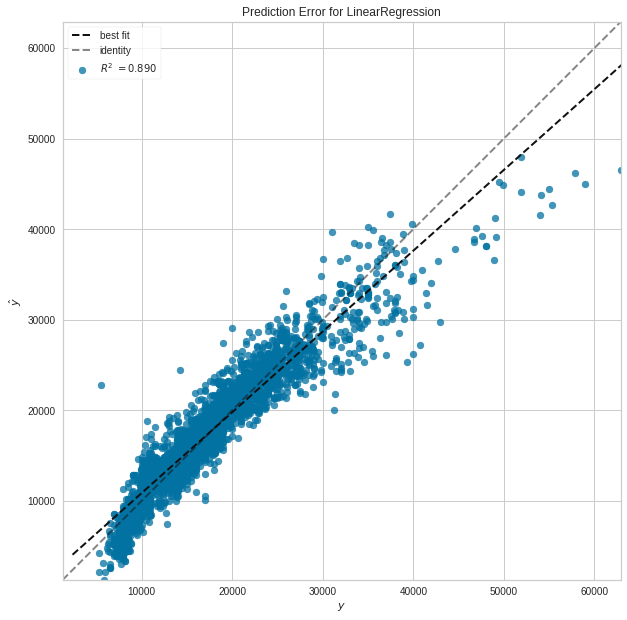

In [50]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Residual Plot

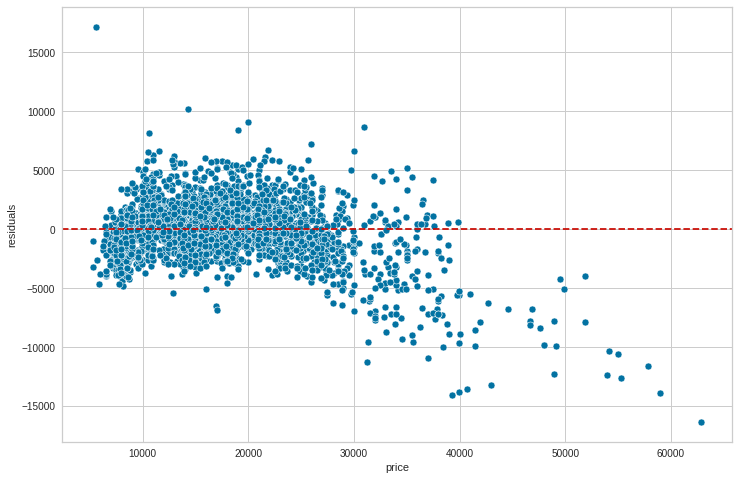

In [51]:
plt.figure(figsize=(12, 8))
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=-residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('residuals')
plt.show();

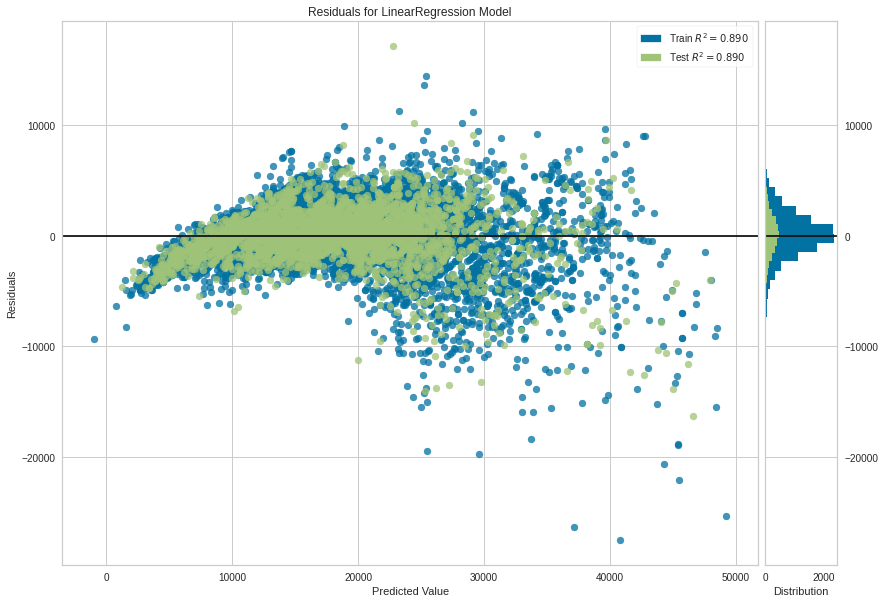

In [52]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        

## Dropping observations from the dataset that worsen my predictions

### test size = 0.2

In [53]:
df3 = df[~(df.price>35000)]
df3

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [54]:
len(df[df.price>35000])

495

In [55]:
df2[df2.price>35000].groupby("make_model").count().iloc[:, 0]

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
Name: body_type, dtype: int64

In [56]:
df2.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [57]:
X = df3.drop(columns='price')
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [58]:
lm_df3 = LinearRegression()
lm_df3.fit(X_train, y_train)

LinearRegression()

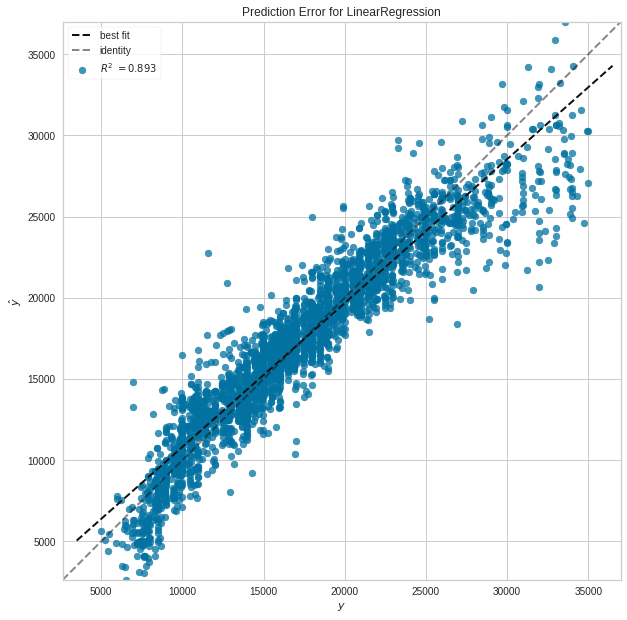

In [59]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [60]:
y_pred = lm_df3.predict(X_test)
y_train_pred = lm_df3.predict(X_train)

pd.DataFrame({'train':{
    'R2': r2_score(y_train, y_train_pred),
    'mae': mean_absolute_error(y_train, y_train_pred),
    'mse': mean_squared_error(y_train, y_train_pred),
    'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred))
}, 'test': {
    'R2': r2_score(y_test, y_pred),
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
}
})

,train,test
R2,0.901,0.893
mae,1406.777,1432.338
mse,3732547.855,3920801.419
rmse,1931.980,1980.101


In [61]:
np.sqrt(mean_squared_error(y_test, y_pred)) / df3.price.mean()

0.1145347004959493

In [62]:
# bir onceki modelde baktigimiz rmse test score ortalamasi

In [63]:
lm_df3_R2 = r2_score(y_test, y_pred)
lm_df3_mae = mean_absolute_error(y_test, y_pred)
lm_df3_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [64]:
compare = pd.DataFrame({'Actual': y_test, 'Pred': y_pred,
                        'Residual': y_test-y_pred})

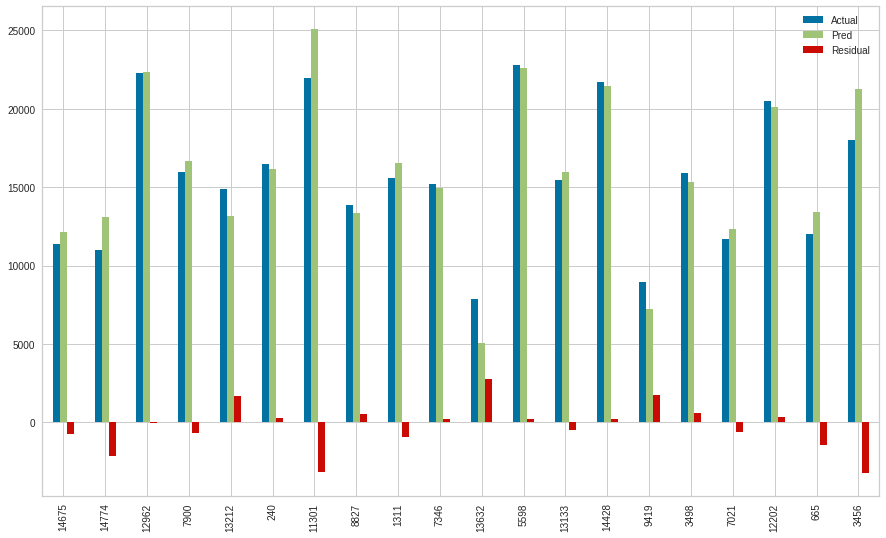

In [65]:
comp_samp = compare.sample(20)
comp_samp.plot(kind='bar', figsize=(15, 9))
plt.show();

In [66]:
comp_samp

,Actual,Pred,Residual
14675,11400,12126.305,-726.305
14774,10990,13135.487,-2145.487
12962,22315,22328.991,-13.991
7900,15990,16687.546,-697.546
13212,14900,13184.839,1715.161
240,16480,16165.596,314.404
11301,21980,25116.254,-3136.254
8827,13890,13368.186,521.814
1311,15600,16523.945,-923.945
7346,15190,14976.156,213.844


In [67]:
pd.DataFrame(lm_df3.coef_, index=X.columns, columns=['Coef']).sort_values('Coef')

,Coef
make_model_Renault Duster,-10053.838
make_model_Renault Clio,-5574.890
make_model_Opel Corsa,-5408.802
make_model_Opel Astra,-3503.177
Drive_chain_rear,-2132.167
Type_Employee's car,-1886.078
Type_Used,-1829.251
Drive_chain_front,-1773.078
Gearing_Type_Manual,-1599.540
age,-1470.211


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [68]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge

## Random state=42

In [69]:
from sklearn.linear_model import Ridge, RidgeCV

In [70]:
ridge_model = Ridge(random_state=42)

In [71]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [74]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

pd.DataFrame({'train':{
    'R2': r2_score(y_train, y_train_pred),
    'mae': mean_absolute_error(y_train, y_train_pred),
    'mse': mean_squared_error(y_train, y_train_pred),
    'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred))
}, 'test': {
    'R2': r2_score(y_test, y_pred),
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
}})

,train,test
R2,0.901,0.893
mae,1406.486,1433.358
mse,3733997.913,3921029.463
rmse,1932.356,1980.159


## Finding best alpha for Ridge

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [77]:
ridge_model = Ridge(random_state=42)

param_grid = {'alpha': alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model, param_grid=param_grid,
                                scoring='neg_root_mean_squared_error', cv=10)

In [78]:
ridge_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42),
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [79]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [80]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082,0.029,0.003,0.002,0.010,{'alpha': 0.01},-1846.721,-2012.195,-1937.863,-1999.581,-1968.254,-1862.746,-1932.746,-2115.351,-2016.120,-1933.649,-1962.523,74.697,3
1,0.043,0.022,0.001,0.000,1.020,{'alpha': 1.02},-1847.547,-2015.048,-1935.817,-1998.532,-1967.559,-1862.128,-1931.827,-2114.355,-2012.288,-1932.487,-1961.759,74.472,1
2,0.026,0.011,0.001,0.000,2.030,{'alpha': 2.03},-1848.852,-2018.609,-1934.875,-1998.340,-1967.951,-1862.665,-1931.825,-2114.110,-2010.543,-1932.339,-1962.011,74.331,2
3,0.018,0.000,0.001,0.000,3.040,{'alpha': 3.04},-1850.314,-2022.316,-1934.582,-1998.583,-1968.885,-1863.545,-1932.258,-2114.251,-2009.833,-1932.740,-1962.731,74.260,4
4,0.018,0.001,0.001,0.000,4.050,{'alpha': 4.05},-1851.855,-2026.008,-1934.703,-1999.105,-1970.120,-1864.621,-1932.975,-2114.619,-2009.764,-1933.489,-1963.726,74.229,5
5,0.019,0.003,0.001,0.000,5.060,{'alpha': 5.06},-1853.444,-2029.632,-1935.107,-1999.829,-1971.536,-1865.835,-1933.903,-2115.139,-2010.129,-1934.476,-1964.903,74.217,6
6,0.020,0.005,0.001,0.000,6.070,{'alpha': 6.07},-1855.064,-2033.173,-1935.714,-2000.707,-1973.069,-1867.156,-1934.997,-2115.767,-2010.806,-1935.639,-1966.209,74.217,7
7,0.018,0.001,0.001,0.000,7.080,{'alpha': 7.08},-1856.706,-2036.628,-1936.472,-2001.709,-1974.680,-1868.562,-1936.224,-2116.480,-2011.716,-1936.933,-1967.611,74.222,8
8,0.019,0.004,0.001,0.000,8.090,{'alpha': 8.09},-1858.362,-2039.999,-1937.347,-2002.812,-1976.347,-1870.037,-1937.559,-2117.260,-2012.807,-1938.330,-1969.086,74.232,9
9,0.017,0.001,0.001,0.000,9.100,{'alpha': 9.1},-1860.029,-2043.292,-1938.313,-2003.999,-1978.054,-1871.570,-1938.982,-2118.098,-2014.039,-1939.810,-1970.619,74.243,10


In [81]:
ridge_grid_model.best_index_

1

In [83]:
ridge_grid_model.best_score_

-1961.7588344515887

In [85]:
y_pred = ridge_grid_model.predict(X_test_scaled)
y_train_pred = ridge_grid_model.predict(X_train_scaled)

pd.DataFrame({'train': {
    'R2': r2_score(y_train, y_train_pred),
    'mae': mean_absolute_error(y_train, y_train_pred),
    'mse': mean_squared_error(y_train, y_train_pred),
    'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred))
}, 'test':{
    'R2': r2_score(y_test, y_pred),
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
}})

,train,test
R2,0.901,0.892
mae,1406.484,1433.380
mse,3734049.320,3921069.706
rmse,1932.369,1980.169


In [87]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coef']).sort_values('Coef')

,Coef
km,-10506.713
make_model_Renault Duster,-8892.505
make_model_Renault Clio,-5546.363
make_model_Opel Corsa,-5414.615
age,-4445.961
make_model_Opel Astra,-3470.641
Displacement_cc,-2597.819
Type_Employee's car,-1869.678
Type_Used,-1821.068
Drive_chain_front,-1667.114


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

In [88]:
from sklearn.linear_model import Lasso, LassoCV

In [89]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [90]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

pd.DataFrame({'train': {
    'R2': r2_score(y_train, y_train_pred),
    'mae': mean_absolute_error(y_train, y_train_pred),
    'mse': mean_squared_error(y_train, y_train_pred),
    'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred))
}, 'test': {
    'R2': r2_score(y_test, y_pred),
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
}})

,train,test
R2,0.901,0.892
mae,1408.177,1435.892
mse,3745994.891,3923806.454
rmse,1935.457,1980.860


## Finding best alpha for Lasso

In [91]:
lasso_model = Lasso(random_state=42)
param_grid = {'alpha': alpha_space}
lasso_grid_model = GridSearchCV(estimator=lasso_model, param_grid=param_grid,
                                scoring='neg_root_mean_squared_error', cv=10)

In [92]:
lasso_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42),
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [93]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [94]:
lasso_grid_model.best_score_

-1959.2857991621495

In [95]:
y_pred = lasso_grid_model.predict(X_test_scaled)
y_train_pred = lasso_grid_model.predict(X_train_scaled)

pd.DataFrame({'train': {
    'R2': r2_score(y_train, y_train_pred),
    'mae': mean_absolute_error(y_train, y_train_pred),
    'mse': mean_squared_error(y_train, y_train_pred),
    'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
}, 'test': {
    'R2': r2_score(y_test, y_pred),
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
}})

,train,test
R2,0.901,0.892
mae,1408.233,1436.003
mse,3746434.277,3924169.452
rmse,1935.571,1980.952


In [96]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coef']).sort_values('Coef')

,Coef
km,-10512.529
make_model_Renault Duster,-7808.490
make_model_Renault Clio,-5489.757
make_model_Opel Corsa,-5404.088
age,-4456.835
make_model_Opel Astra,-3464.072
Displacement_cc,-2201.878
Type_Employee's car,-1765.441
Type_Used,-1739.487
Gearing_Type_Manual,-1632.669


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

In [97]:
from sklearn.linear_model import ElasticNet

In [98]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [100]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

pd.DataFrame({'train': {
    'R2': r2_score(y_train, y_train_pred),
    'mae': mean_absolute_error(y_train, y_train_pred),
    'mse': mean_squared_error(y_train, y_train_pred),
    'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred))
}, 'test': {
    'R2': r2_score(y_test, y_pred),
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
}})

,train,test
R2,0.600,0.597
mae,3078.053,3021.189
mse,15140436.641,14688556.576
rmse,3891.071,3832.565


## Finding best alpha and l1_ratio for ElasticNet

## random state = 42

In [101]:
elastic_model = ElasticNet(random_state=42)

In [102]:
param_grid = {'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
              'l1_ratio': [.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid,
                                  scoring='neg_root_mean_squared_error', cv=10)

In [103]:
elastic_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [104]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [105]:
elastic_grid_model.best_score_

-1959.2857991621495

In [106]:
y_pred = elastic_grid_model.predict(X_test_scaled)
y_train_pred = elastic_grid_model.predict(X_train_scaled)

pd.DataFrame({'train': {
    'R2': r2_score(y_train, y_train_pred),
    'mae': mean_absolute_error(y_train, y_train_pred),
    'mse': mean_squared_error(y_train, y_train_pred),
    'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred))
}, 'test': {
    'R2': r2_score(y_test, y_pred),
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
}})

,train,test
R2,0.901,0.892
mae,1408.233,1436.003
mse,3746434.277,3924169.452
rmse,1935.571,1980.952


## Feature Importance

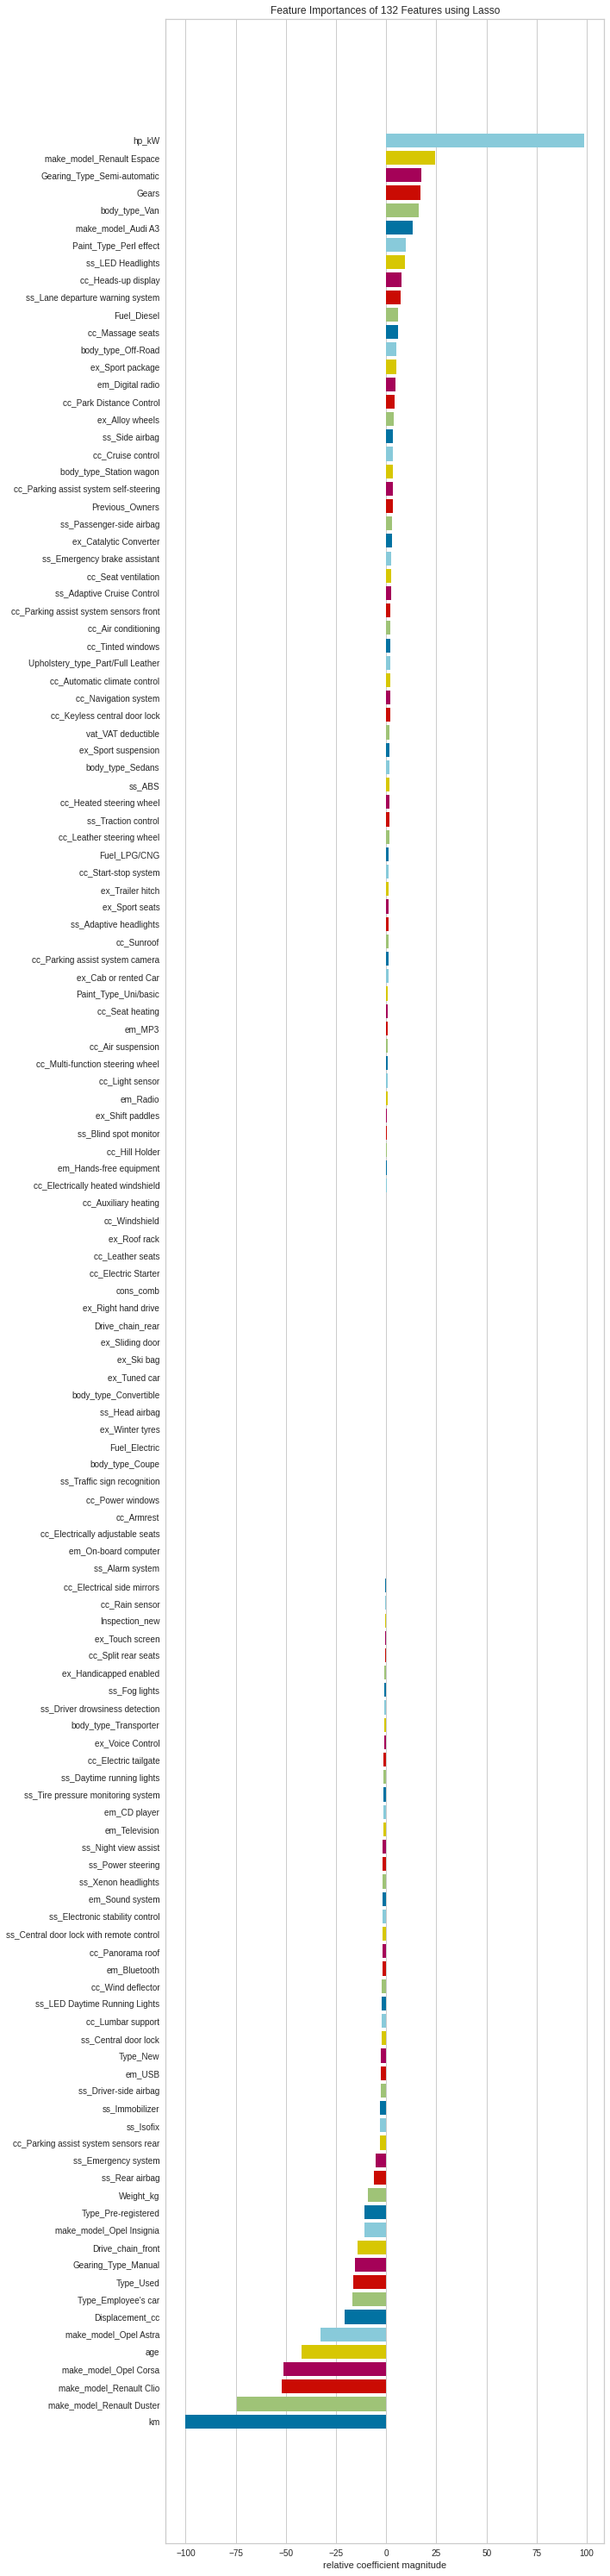

In [107]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [108]:
df_new = df2[['make_model', 'hp_kW', 'km', 'age', 'Gearing_Type', 'price']]

In [109]:
df_new

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790
...,...,...,...,...,...,...
15910,Renault Espace,147.000,1647.363,0.000,Automatic,39950
15911,Renault Espace,165.000,9900.000,0.000,Automatic,39885
15912,Renault Espace,146.000,15.000,0.000,Automatic,39875
15913,Renault Espace,147.000,10.000,0.000,Automatic,39700


In [110]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [112]:
df_new[df_new['make_model'] == 'Audi A2']

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [113]:
df_new.drop(index=[2614], inplace=True)

In [114]:
df_new = df_new[~(df_new.price > 35000)]

In [115]:
df_new = pd.get_dummies(df_new)
df_new

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15787,118.000,10803.000,1.000,33990,0,0,0,0,0,0,0,1,1,0,0
15788,165.000,15.000,0.000,33975,0,0,0,0,0,0,0,1,1,0,0
15789,118.000,1.000,1.000,33990,0,0,0,0,0,0,0,1,1,0,0
15790,146.000,15.000,0.000,33975,0,0,0,0,0,0,0,1,1,0,0


In [116]:
len(df_new)

15419

In [ ]:
## test_size=0.2, random_state=101)

In [ ]:
##Lasso(random_state=42)

In [117]:
X = df_new.drop(columns=['price'])
y = df_new.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [118]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model, param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error', cv=10)

In [119]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42),
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [120]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [121]:
lasso_final_model.best_score_

-2215.1736822029334

In [122]:
y_pred = lasso_final_model.predict(X_test_scaled)
y_train_pred = lasso_final_model.predict(X_train_scaled)

pd.DataFrame({'train': {
    'R2': r2_score(y_train, y_train_pred),
    'mae': mean_absolute_error(y_train, y_train_pred),
    'mse': mean_squared_error(y_train, y_train_pred),
    'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred))
}, 'test': {
    'R2': r2_score(y_test, y_pred),
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
}})

,train,test
R2,0.871,0.864
mae,1595.675,1602.663
mse,4899732.663,4973111.846
rmse,2213.534,2230.047


In [123]:
np.sqrt(mean_squared_error(y_test, y_pred))/df_new.price.mean()  #rmse/df_new.price.mean()

0.12899229642518242

## 7. Visually Compare Models Performance In a Graph

In [ ]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.893,1432.338,1980.101
ridge_m,0.892,1433.380,1980.169
lasso_m,0.892,1436.003,1980.952
elastic_m,0.892,1436.003,1980.952
final_m,0.864,1602.663,2230.047


In [ ]:
for i in scores:
    print(i)

r2_score
mae
rmse


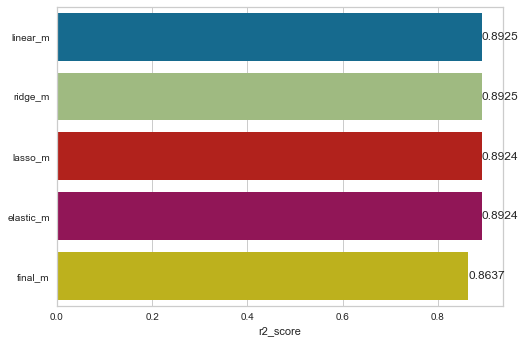

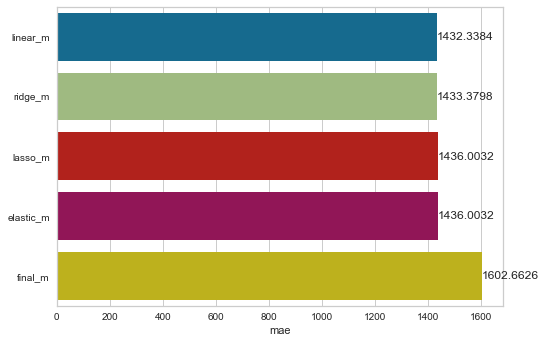

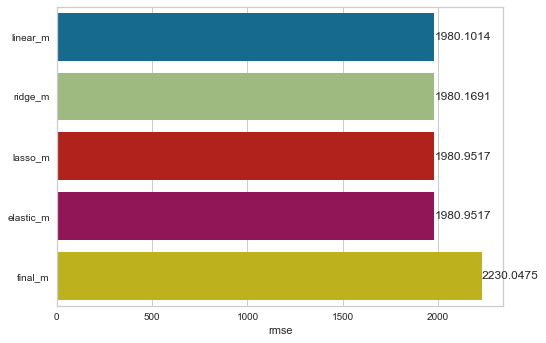

In [ ]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

## random state=42

In [124]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [126]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=10)

In [127]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(random_state=42),
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [128]:
final_model.best_estimator_

Lasso(alpha=0.01, random_state=42)

In [129]:
my_dict = {'hp_kW': 66, 'age': 2, 'km': 17000, 'make_model': 'Audi A3',
           'Gearing_Type': 'Automatic'}


In [130]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [131]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,1,1


In [132]:
X.head(1)

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,1,0,0,0,0,0,0,0,1,0,0


In [133]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)

In [134]:
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,1,0,0,0,0,0,0,1,0,0


In [135]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___